# Advertising Sales Channel Prediction Practice project 6

# Problem Statement:
Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, 
as well as market know-how and customer knowledge and understanding. 
Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

To predict:
the total sales generated from all the sales channel.  

In [1]:
#Importing All Libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import RandomizedSearchCV
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import r2_score ,mean_absolute_error,mean_squared_error
#from math import sqrt
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")
# pd.set_option('display.max_rows',None)
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.shape

(200, 5)

In [4]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [5]:
df.nunique()

Unnamed: 0    200
TV            190
radio         167
newspaper     172
sales         121
dtype: int64

In [6]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

<AxesSubplot:>

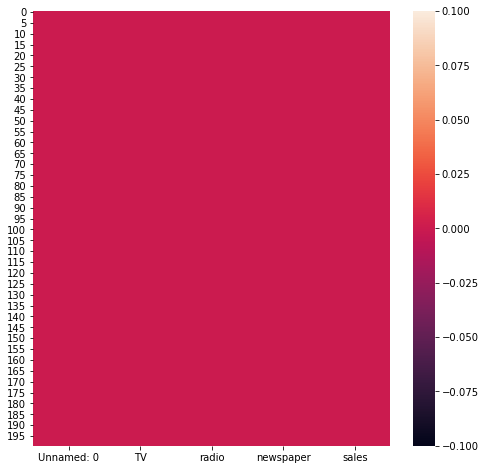

In [7]:
plt.figure(figsize=[8,8])
sns.heatmap(df.isnull())

In [8]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


### Dropping The columns:

In [9]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [10]:
df_new=df

In [11]:
df_new.shape

(200, 5)

In [12]:
df_new=df.drop('Unnamed: 0', axis=1)

In [13]:
df.shape

(200, 5)

In [14]:
df_new.shape

(200, 4)

# EDA

# Univariate Analysis

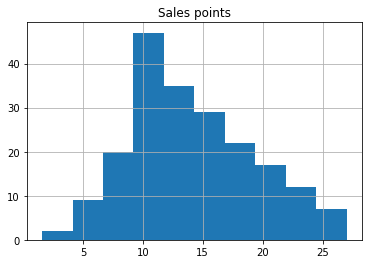

In [15]:
df_new["sales"].hist(grid=True)
plt.title("Sales points")
plt.show()

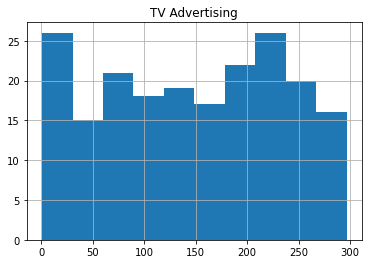

In [16]:
df_new["TV"].hist(grid=True)
plt.title("TV Advertising")
plt.show()

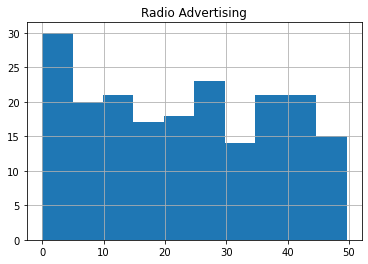

In [17]:
df_new["radio"].hist(grid=True)
plt.title("Radio Advertising")
plt.show()

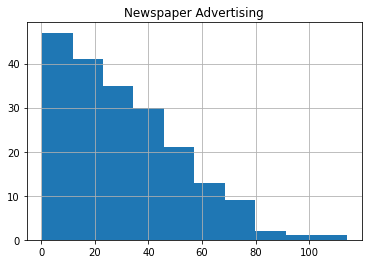

In [18]:
df_new["newspaper"].hist(grid=True)
plt.title("Newspaper Advertising")
plt.show()

# Bivariate Analysis

<AxesSubplot:title={'center':'Sales by TV Advertising'}, xlabel='TV', ylabel='sales'>

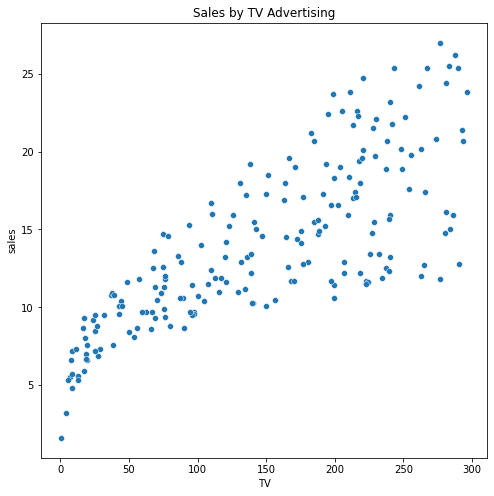

In [19]:
plt.figure(figsize=[8,8])
plt.title('Sales by TV Advertising')
sns.scatterplot(df_new['TV'],df_new['sales'],palette='bright')

<AxesSubplot:title={'center':'Sales by Radio Advertising'}, xlabel='radio', ylabel='sales'>

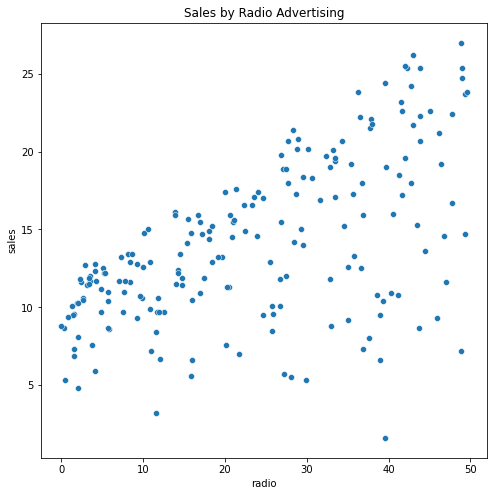

In [20]:
plt.figure(figsize=[8,8])
plt.title('Sales by Radio Advertising')
sns.scatterplot(df_new['radio'],df_new['sales'],palette='bright')

<AxesSubplot:title={'center':'Sales by Newspaper Advertising'}, xlabel='newspaper', ylabel='sales'>

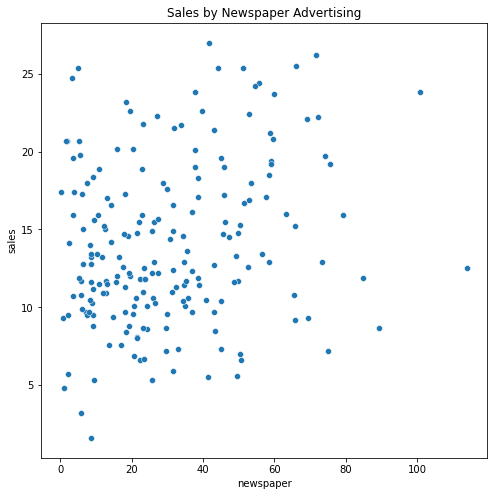

In [21]:
plt.figure(figsize=[8,8])
plt.title('Sales by Newspaper Advertising')
sns.scatterplot(df_new['newspaper'],df_new['sales'],palette='bright')

# Multivariate Analysis

In [22]:
corr_mat=df_new.corr()
corr_mat

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


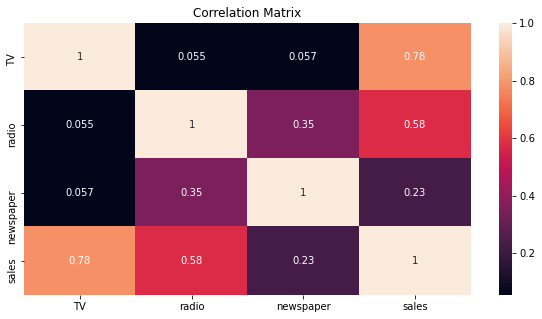

In [23]:
plt.figure(figsize=[10,5])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

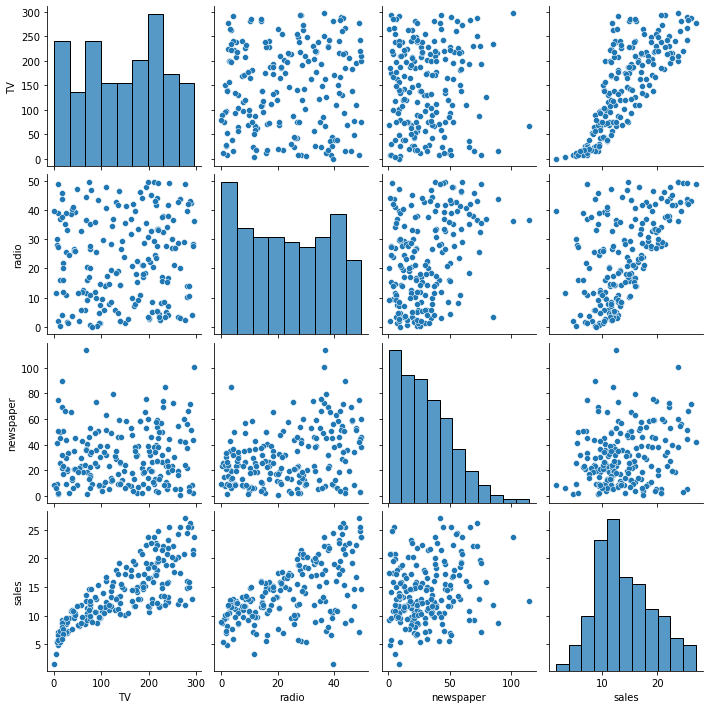

In [24]:
sns.pairplot(df_new,palette='bright')

# Lets check Outliers with boxplot

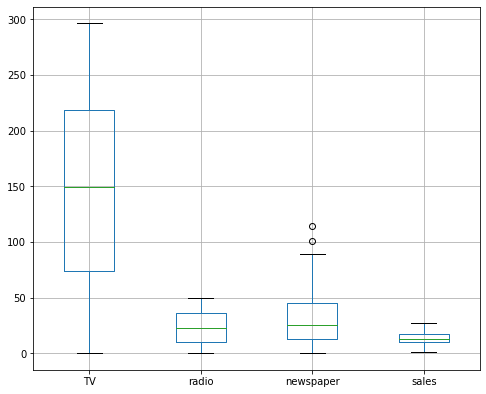

In [25]:
df_new.iloc[:,0:5].boxplot(figsize=[8,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [26]:
collist=df_new.columns.values
collist

array(['TV', 'radio', 'newspaper', 'sales'], dtype=object)

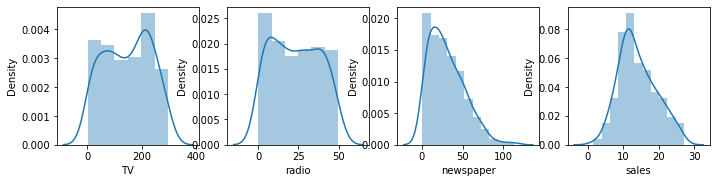

In [27]:
plt.figure(figsize=(30,30))
for i in range(0,len(collist)):
    plt.subplot(10,10,i+1)
    sns.distplot(df_new[collist[i]])

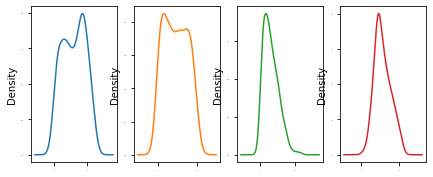

In [28]:
df_new.plot(kind='density', subplots=True, layout=(6,11), sharex=False, legend=False,fontsize=1,figsize=(20,20))
plt.show()

# Outliers and Skewness 

In [29]:
from scipy.stats import zscore
z=np.abs(zscore(df_new))
df_new2=df_new[(z<3).all(axis=1)]

In [30]:
df_new2.shape

(198, 4)

In [31]:
df_new.shape

(200, 4)

In [32]:
((200-198)/200)*100

1.0

In [33]:
df_new2.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

In [34]:
x=df_new2.drop("sales",axis=1)
y=df_new2["sales"]

In [35]:
from sklearn.preprocessing import power_transform
df_skew=power_transform(x)
df_skew=pd.DataFrame(df_skew,columns=x.columns)

In [36]:
df_new2.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

In [37]:
df_skew.shape

(198, 3)

In [38]:
df_skew.skew()

TV          -0.320682
radio       -0.236668
newspaper   -0.101288
dtype: float64

In [39]:
y.shape

(198,)

In [40]:
x.shape

(198, 3)

# Finding Best Random State:

In [41]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
 #  acc=accuracy_score(y_test,pred)
    acc=(r2_score(y_test,pred))
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is  "  ,maxAccu , "  at random_state:", maxRS)

Best accuracy is   0.9477136584598764   at random_state: 90


In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=90)

In [43]:
x_test.shape

(40, 3)

In [44]:
x_train.shape

(158, 3)

In [45]:
y_test.shape

(40,)

In [46]:
y_train.shape

(158,)

In [47]:
df_skew.describe()

,TV,radio,newspaper
count,1.980000e+02,1.980000e+02,1.980000e+02
mean,2.427912e-16,-1.351332e-16,2.467162e-17
std,1.002535e+00,1.002535e+00,1.002535e+00
min,-2.033234e+00,-1.984958e+00,-2.275846e+00
25%,-7.687484e-01,-8.085412e-01,-7.703708e-01
50%,1.237363e-01,9.375009e-02,5.779614e-03
75%,8.409222e-01,8.920919e-01,7.924599e-01
max,1.560256e+00,1.548193e+00,2.139373e+00


# Standardisation

# Model Building:

In [48]:
lm=LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
print("Coefficient : ",lm.coef_)
print("Intercept   : ",lm.intercept_)
print("Score       : ",lm.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Coefficient :  [0.04475824 0.1867263  0.00061134]
Intercept   :  3.0719157304526234
Score       :  0.8791542940797823
 
error
Mean absolute error    : 1.0231352276209504
Mean squared error     : 1.5762554238734894
Root mean squared error: 1.2554901130130374
 
r2 score :  0.9477136584598764


In [49]:
ls=Lasso(alpha=0.0001) 
ls.fit(x_train,y_train)
print("Coefficient : ",ls.coef_)
print("Intercept   : ",ls.intercept_)
print("Score       : ",ls.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Coefficient :  [0.04475823 0.18672591 0.00061121]
Intercept   :  3.0719297061322024
Score       :  0.8791542940777913
 
error
Mean absolute error    : 1.0231352276209504
Mean squared error     : 1.5762554238734894
Root mean squared error: 1.2554901130130374
 
r2 score :  0.9477136584598764


In [50]:
rd=Ridge(alpha=0.0001)# to minimize the coefficient varience
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
print("Coefficient : ",rd.coef_)
print("Intercept   : ",rd.intercept_)
print("Score       : ",rd.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Coefficient :  [0.04475824 0.18672629 0.00061134]
Intercept   :  3.0719157400714803
Score       :  0.8791542940797823
 
error
Mean absolute error    : 1.0231352276209504
Mean squared error     : 1.5762554238734894
Root mean squared error: 1.2554901130130374
 
r2 score :  0.9477136584598764


In [51]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
#print("Coefficient : ",rf.coef_)
# print("Intercept   : ",rf.intercept_)
print("Score       : ",rf.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Score       :  0.9962515257008611
 
error
Mean absolute error    : 1.0231352276209504
Mean squared error     : 1.5762554238734894
Root mean squared error: 1.2554901130130374
 
r2 score :  0.9477136584598764


In [52]:
#Pridict the value
pred=lm.predict(x_test)
print("Predicted advertising sale : ", pred )
print("Actual Advertising sale :", y_test)

Predicted advertising sale :  [17.26594009  6.66199497 20.98941564 18.38229595 16.31877467 21.16146847
 20.33593936 15.18679057 20.75686052 10.44520321 20.6776946  23.19955932
 10.03430028 21.38635479 23.09535934  7.99614271 14.46446332 12.42957228
 15.42324638 11.78450364  7.71276857 13.81299126 14.01507113  9.72407748
 21.49236916 13.31075715 10.00359211  8.85936594  9.71177928 20.99976541
 12.73459192  9.244411   18.42716812  8.67096917  8.20805294 11.49067043
  8.22429309 12.16775294 16.94331051 18.25366965]
Actual Advertising sale : 163    18.0
22      5.6
69     22.3
193    19.6
40     16.6
93     22.2
39     21.5
146    13.2
15     22.4
72      8.8
84     21.7
36     25.4
157    10.1
42     20.7
17     24.4
121     7.0
83     13.6
1      10.4
154    15.6
6      11.8
172     7.6
112    14.1
135    11.6
186    10.3
30     21.4
167    12.2
90     11.2
13      9.7
145    10.3
111    21.8
197    12.8
29     10.5
184    17.6
56      5.5
196     9.7
80     11.8
24      9.7
177    11.7


Observation:
From the above Prediction we can see that the prediction are of good.
for 1st data:   Actual :18   and   Predicted:17.26   not much difference.

# CrossValidation Checking

In [53]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lm,x,y,cv=5)
print("Cross Validation Score of LinearRegression Model is : ", scr.mean())

Cross Validation Score of LinearRegression Model is :  0.8853605756683912


In [54]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(ls,x,y,cv=5)
print("Cross Validation Score of Lasso Model is : ", scr.mean())

Cross Validation Score of Lasso Model is :  0.8853607461154166


In [55]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rd,x,y,cv=5)
print("Cross Validation Score of RidgeRegression Model is : ", scr.mean())

Cross Validation Score of RidgeRegression Model is :  0.8853605757238483


In [56]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rf,x,y,cv=5)
print("Cross Validation Score of RandomForestRegressor Model is : ", scr.mean())

Cross Validation Score of RandomForestRegressor Model is :  0.9759434064293402


# Parameter Tuning

In [61]:
from sklearn.model_selection import GridSearchCV

#For Classifications: parameters={'max_depth': np.arange(2,10),'criterion': ['gini','entropy']}

#Linear Regression: parameters={"fit_intercept":(True,False), "normalize":(False,True), "copy_X":(True,False),"positive":(False,True)}

#RandomForestRegressor: 
parameters={"max_depth":range(2,8),"bootstrap":[True,False], "criterion":["mse", "mae"],}

# nneighbors : parameters = dict(n_neighbors = [1,3,5,7,9])

# svm = SVC(kernel=”rbf”) : parameters = {“C”: [1, 10, 100],”gamma”: [.01, .1]}

# AdaBoost regression:
#boost = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),random_state=90)
#parameters = {'n_estimators': (1, 2),'base_estimator__max_depth': (1, 2)}

# create and fit a ridge regression model, testing each alpha
#alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
#parameters=dict(alpha=alphas)



In [62]:
gcv=GridSearchCV(RandomForestRegressor(), parameters,cv=5) #Tuning

In [63]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mse', 'mae'],
                         'max_depth': range(2, 8)})

In [64]:
gcv.best_params_
#print(gcv.best_score_)
#print(gcv.best_estimator_.alpha)

{'bootstrap': True, 'criterion': 'mae', 'max_depth': 7}

In [65]:
mod=RandomForestRegressor(bootstrap= True, criterion='mae',max_depth=7,random_state=90)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(r2_score(y_test,pred)*100)

98.2481426802691


# Observation: Thus we have obtained the best accuracy is with RandomForestRegresson 98.2%.
Earlier accuracy in cross validation was 97.5% . Now after Hyper tuning it is increased to 98.2%

# Saving the model

In [66]:
import joblib
joblib.dump(mod,"Advertsing sales.pkl")

['Advertsing sales.pkl']

# Loading the saved model

In [67]:
model=joblib.load("Advertsing sales.pkl")

In [68]:
prediction=model.predict(x_test)

In [69]:
print(r2_score(y_test,prediction)*100)

98.2481426802691


In [70]:
prediction=pd.DataFrame(prediction) #Converting into Dataframe

In [71]:
prediction.to_csv('Results.csv') #Saving the predictions

In [72]:
prediction

,0
0,17.5890
1,6.4240
2,23.3495
3,19.5265
4,15.9690
5,20.9080
6,21.2370
7,12.6365
8,22.9145
9,8.4775


# summary and conclusion: 
Our analysis shows TV has the highest sales.
Best model was with RandomForestRegresson with 97.8% acuuracy.
And in above we have Saved and Loaded the model for checking the Predictions.